### Market Basket Analysis of Drugs Reported with Adverse Events

implemented under R 3.3.1

### Data Description

The FDA&#39;s database of adverse event reports is made available through a web API at

https://open.fda.gov/drug/event/. Each report contains general information about the report,

patient information, a list of the drugs that the patient is taking, and a list of the patient reactions.  It

is possible to use these data in many ways: your brief is to explore these data and to see what might

be learned from them. 

###### The drugs taken by a patient for which an adverse event was reported were extracted from this database (see the notebook Adverse_event_drug_prep.ipynb)

### Task

The goal of the present work is to answer the question "which drugs tend to be taken together?". To do so, the drugs reported with an event are processed as a "single transaction within a market basket" and the apriori algorithm is used to find the items that often occur together within transactional database.

In [23]:
library(arules)

In [24]:

Groceries <- read.transactions('./drug_event_clean.csv', sep = ',', skip = 1) #keep potential duplicates

Potential duplicates are kept as different patients might be taken the same set of drugs

In [25]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 28155 rows (elements/itemsets/transactions) and
 12419 columns (items) and a density of 0.0002353821 

most frequent items:
     FORTEO     PEGASYS  RIBAVIRIN.     CALCIUM PREDNISONE.     (Other) 
       2812        2044        1603         993         892       73959 

element (itemset/transaction) length distribution:
sizes
    2     3     4     5     6     7     8     9    10    11    12    13    14 
17069  5494  2328  1243   703   389   240   345   100    94    45    29    28 
   15    16    17    18    19    20    21    22    24    30    34 
   17    11     4     3     3     3     1     2     2     1     1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.923   3.000  34.000 

includes extended item information - examples:
                      labels
1 (90)Y-IBRITUMOMAB TIUXETAN
2                (SPIRUTEIN)
3             ^A CHEMO DRUG^

In [26]:
itemLabels(Groceries)[1:20]

[1] "(90)Y-IBRITUMOMAB TIUXETAN"                     
 [2] "(SPIRUTEIN)"                                    
 [3] "^A CHEMO DRUG^"                                 
 [4] "^BLOOD PRESSURE^ MEDICATION"                    
 [5] "^LDN^"                                          
 [6] "^OTHER HERBAL MARKERS^"                         
 [7] "^OVER 50^ MULTIVITAMIN"                         
 [8] "^THYROID MEDICATION^"                           
 [9] "^VITAMINS^ (NOS)"                               
[10] "0.9 SOLUTION OF NACL"                           
[11] "0.9% SODIUM CHLORIDE INJECTION"                 
[12] "1-ALPHA-25-DIHYDROXYVITAMIN D3"                 
[13] "1-ARGININE PLUS"                                
[14] "1% HYDROCORTISONE"                              
[15] "10% DEXTROSE AND 0.9% SODIUM CHLORIDE INJECTION"
[16] "13-CIS-RETINOIC ACID"                           
[17] "14-HYDROXYDAUNOMYCIN HCL"                       
[18] "2% KETOCONAZOLE CREAM CREAM"                    
[19] "2% LIDOCAINE WITH 1:80 000 EPINEPHRINE"         
[20] "20% MANNITOL INJECTION"

we have a total of 28155 events (rows) and 12419 different drug items (columns) that might appear in a single adverse event report. 

The most frequent drugs are FORTEO, PEGASYS,  RIBAVIRIN.,    CALCIUM PREDNISONE.  as reported with the number of event in which they appear.

A total of 17069 event contains only two drugs, 5494 only 3 and so on.

The first quantile and the median has 2 items respectively, 

The mean number of drugs per event is 2.923.

The drugs used in the first five events are 

In [27]:
inspect(Groceries[1:5])

    items                                           
[1] {ONBREZ INHALATION CAPSUL,                      
     SEIHAITO}                                      
[2] {CERTOLIZUMAB PEGOL RA,                         
     PANTOLOC}                                      
[3] {BCG FOR IMMUNOTHERAPY,                         
     IMMUNOBLADDER}                                 
[4] {ESIDREX,                                       
     PANTOPRAZOLO MYLAN 20MG GASTRORESISTANT TABLET}
[5] {5- HT3 RECEPTOR ANTAGONISTS,                   
     HYPODERMIC ATROPINE,                           
     IRINOTECAN,                                    
     NIMOTUZUMAB}                                   


Let print the top 25 drug items

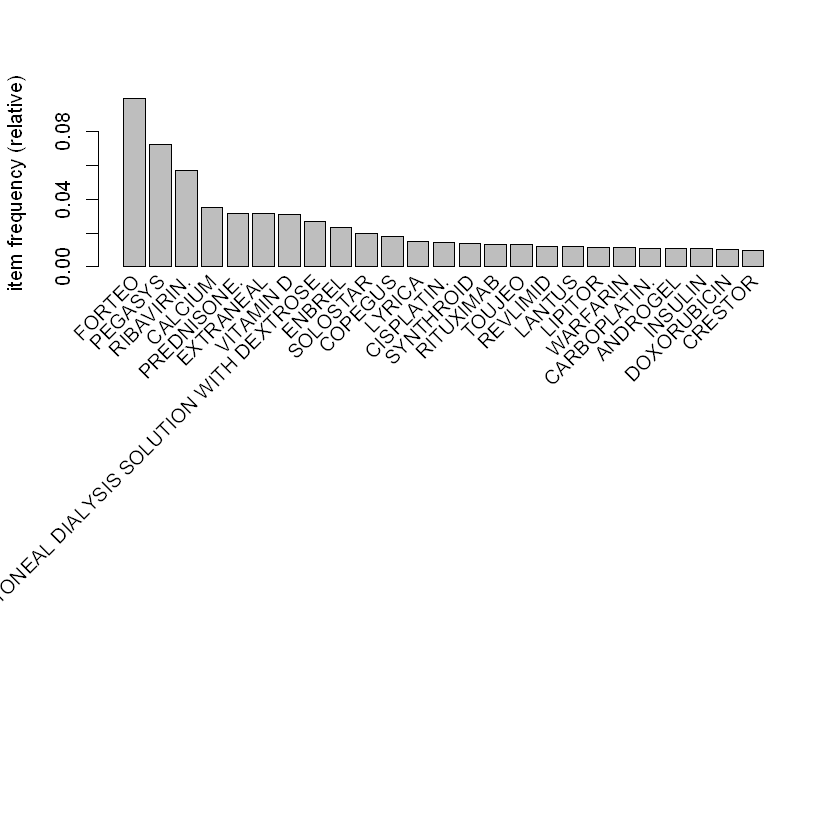

In [28]:
itemFrequencyPlot(Groceries, topN = 25)


Or based on the items frequency

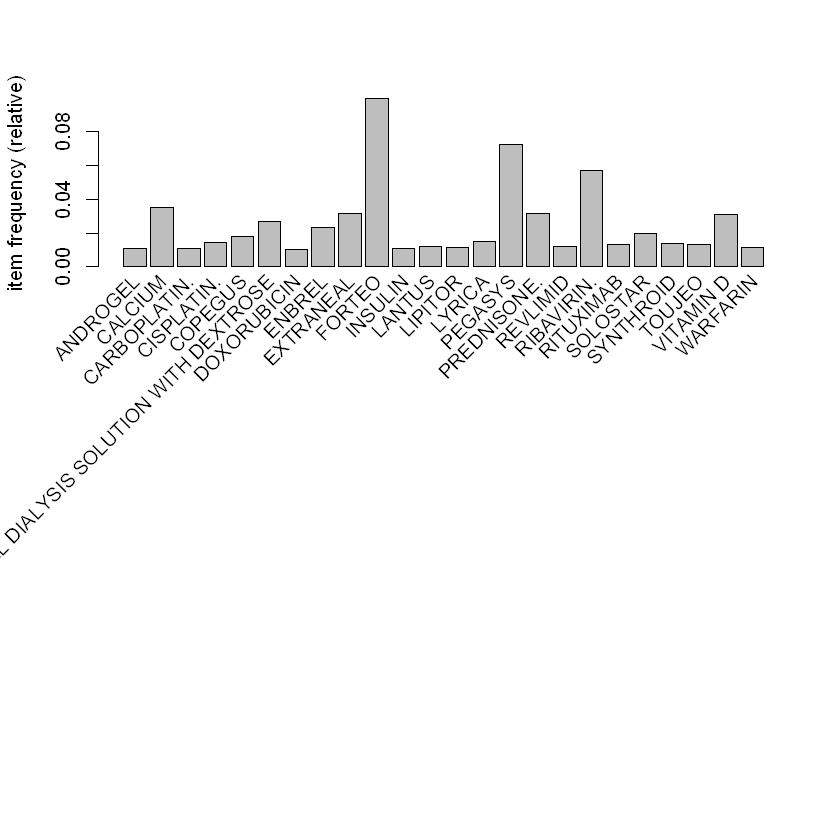

In [29]:
itemFrequencyPlot(Groceries, support = 0.01)


Running the apriori algorithm with default confidence (0.8) and support (0.1) results in a set of 0 rules. 

In [30]:
apriori(Groceries)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2815 

set item appearances ...[0 item(s)] done [0.02s].
set transactions ...[12419 item(s), 28155 transaction(s)] done [0.08s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

One needs to decrease both the confidence and support to get the chance of finding rules. But these values should not be set too low as it will result in an unwidely number of rules that is difficult to process.

For the support, we consider here that if an item appears about 28 times within 28000 reports it is an item of interest

28/28155 = 0.0001

confidence of 0.25 means in order to be included in the result the rule has to be corrected around 25 percent of times

maxlen is set to 2 here to limit the rules to return only  pair combination of products

In [31]:
groceryrules <- apriori(Groceries, parameter = list(support= 0.001, confidence =0.25, maxlen=2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      2  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 28 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12419 item(s), 28155 transaction(s)] done [0.02s].
sorting and recoding items ... [448 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2

Warning message in apriori(Groceries, parameter = list(support = 0.001, confidence = 0.25, :
"Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!"

 done [0.08s].
writing ... [231 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [32]:
groceryrules

set of 231 rules 

In [33]:
summary(groceryrules)

set of 231 rules

rule length distribution (lhs + rhs):sizes
  2 
231 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support           confidence          lift        
 Min.   :0.001030   Min.   :0.2500   Min.   :  2.861  
 1st Qu.:0.001527   1st Qu.:0.4658   1st Qu.: 33.194  
 Median :0.002912   Median :0.6897   Median : 87.812  
 Mean   :0.004459   Mean   :0.6704   Mean   :118.865  
 3rd Qu.:0.005807   3rd Qu.:0.9131   3rd Qu.:128.399  
 Max.   :0.045853   Max.   :1.0000   Max.   :563.100  

mining info:
      data ntransactions support confidence
 Groceries         28155   0.001       0.25

Viewing the first three rules

In [34]:
inspect(groceryrules[1:3])

    lhs                                                              rhs                                                               support confidence     lift
[1] {PEG-INTERFERON ALFA 2A}                                      => {RIBAVIRIN.}                                                  0.001065530  0.9375000  16.4662
[2] {LOW CALCIUM PERITONEAL DIALYSIS SOLUTION WITH 1.5% DEXTROSE} => {LOW CALCIUM PERITONEAL DIALYSIS SOLUTION WITH 2.5% DEXTROSE} 0.001101048  0.8157895 478.5115
[3] {LOW CALCIUM PERITONEAL DIALYSIS SOLUTION WITH 2.5% DEXTROSE} => {LOW CALCIUM PERITONEAL DIALYSIS SOLUTION WITH 1.5% DEXTROSE} 0.001101048  0.6458333 478.5115


Sorting the rules according to lift (all the 231 rules)

In [35]:
inspect(sort(groceryrules, by = 'lift')[1:231])

      lhs                                                                 rhs                                                                  support confidence       lift
[1]   {CYCLOPHOSPHOMIDE}                                               => {G-CSF}                                                          0.001172083  1.0000000 563.100000
[2]   {G-CSF}                                                          => {CYCLOPHOSPHOMIDE}                                               0.001172083  0.6600000 563.100000
[3]   {PYRAZINAMIDE.}                                                  => {ETHAMBUTOL}                                                     0.001278636  0.8780488 537.423118
[4]   {ETHAMBUTOL}                                                     => {PYRAZINAMIDE.}                                                  0.001278636  0.7826087 537.423118
[5]   {PYRAZINAMIDE.}                                                  => {RIFAMPICIN}                                                 

Finding rules with specific items

For example based on a drug item name, we can find the other drugs associated with this item and have an idea of the patient diseases.

These are listed as follows.

In [36]:
tuberculosisrules <- subset(groceryrules, items %in% 'PYRAZINAMIDE.')

In [37]:
inspect(tuberculosisrules)

    lhs                rhs             support     confidence lift    
[1] {PYRAZINAMIDE.} => {RIFAMPICIN}    0.001136565 0.7804878  511.0380
[2] {RIFAMPICIN}    => {PYRAZINAMIDE.} 0.001136565 0.7441860  511.0380
[3] {PYRAZINAMIDE.} => {ETHAMBUTOL}    0.001278636 0.8780488  537.4231
[4] {ETHAMBUTOL}    => {PYRAZINAMIDE.} 0.001278636 0.7826087  537.4231
[5] {PYRAZINAMIDE.} => {ISONIAZID.}    0.001349671 0.9268293  427.7849
[6] {ISONIAZID.}    => {PYRAZINAMIDE.} 0.001349671 0.6229508  427.7849


Same for patients undergoing cancer

In [38]:
cancererules <- subset(groceryrules, items %in% 'DOXORUBICIN')


In [39]:
inspect(cancererules)

    lhs                                    
[1] {5-FLUOROURACIL}                     =>
[2] {DOXORUBICIN}                        =>
[3] {CYCLOPHOSPHAMIDE FOR INJECTION USP} =>
[4] {DOXORUBICIN}                        =>
[5] {CYCLOPHOSPHAMIDE.}                  =>
[6] {DOXORUBICIN}                        =>
[7] {VINCRISTINE}                        =>
[8] {DOXORUBICIN}                        =>
    rhs                                  support     confidence lift    
[1] {DOXORUBICIN}                        0.002699343 0.8636364  81.87098
[2] {5-FLUOROURACIL}                     0.002699343 0.2558923  81.87098
[3] {DOXORUBICIN}                        0.002912449 0.8282828  78.51954
[4] {CYCLOPHOSPHAMIDE FOR INJECTION USP} 0.002912449 0.2760943  78.51954
[5] {DOXORUBICIN}                        0.003019002 0.3359684  31.84912
[6] {CYCLOPHOSPHAMIDE.}                  0.003019002 0.2861953  31.84912
[7] {DOXORUBICIN}                        0.003445214 0.4449541  42.18075
[8] {VINCRISTINE}   

In [40]:
cancererules2 <- subset(groceryrules, items %in% 'ENDOXAN BAXTER')


In [41]:
inspect(cancererules2)

    lhs                 rhs              support     confidence lift     
[1] {EPIRUBICIN}     => {ENDOXAN BAXTER} 0.001101048 0.4843750  194.82254
[2] {ENDOXAN BAXTER} => {EPIRUBICIN}     0.001101048 0.4428571  194.82254
[3] {ENDOXAN BAXTER} => {VINCRISTINE}    0.001030012 0.4142857   53.50557
[4] {ENDOXAN BAXTER} => {RITUXIMAB}      0.001278636 0.5142857   38.30612
[5] {ENDOXAN BAXTER} => {PREDNISONE.}    0.001314154 0.5285714   16.68378


In [42]:
hepatiteCrules <- subset(groceryrules, items %in% 'VIEKIRAX')

In [43]:
inspect(hepatiteCrules)

    lhs           rhs          support     confidence lift      
[1] {EXVIERA}  => {VIEKIRAX}   0.005469721 1.0000000  166.597633
[2] {VIEKIRAX} => {EXVIERA}    0.005469721 0.9112426  166.597633
[3] {VIEKIRAX} => {RIBAVIRIN.} 0.002131060 0.3550296    6.235719


In [44]:
#write(groceryrules, file = 'submission_groceryrules.csv',
#     sep = ',', quote =TRUE, row.names = FALSE)

In [45]:
#groceryrules_df <- as(groceryrules, 'data.frame')

In [46]:
#str(groceryrules_df)